### EDA - Project :
"Bengaluru Used Cars Price Analysis"

#### Problem Statement
The goal of this project is to analyze the Bengaluru used car market to understand the factors that influence car prices.  
By using historical data of used cars in Bengaluru, this project aims to:  
Identify key factors (such as brand, mileage, year, fuel type) that most strongly affect the resale value of cars.  
Provide insights into trends in car demand and pricing patterns to assist buyers, sellers, and dealers in making informed decisions.

##### importing required libraries

In [79]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('Benguluru_Used_Cars_Data_clean.csv')

In [81]:
df.head()

,Unnamed: 0,Brand,Model,Year_of_Manufacture,Fuel_Type,KMs_Driven,Location,Car_Age_Category,Price(in_Lakhs)
0,0,Mahindra,XUV700 AX 7 Diesel AT AWD Luxury Pack 7 STR,2022,Diesel,29705,Singasandra,New,26.95
1,1,Mahindra,XUV500 W7 AT,2018,Diesel,49131,Singasandra,Moderate,13.45
2,2,Tata,Nexon XZ Plus Diesel Dark Edition,2022,Diesel,12336,Singasandra,New,12.95
3,3,BMW,3 Series 320d Sport Line,2020,Diesel,44244,BTM Layout,Moderate,45.25
4,4,Maruti Suzuki,Ertiga ZXi AT,2021,Petrol,8412,Singasandra,Moderate,11.85


In [82]:
df.columns

Index(['Unnamed: 0', 'Brand', 'Model', 'Year_of_Manufacture', 'Fuel_Type',
       'KMs_Driven', 'Location', 'Car_Age_Category', 'Price(in_Lakhs)'],
      dtype='object')

In [83]:
df.drop(columns='Unnamed: 0', inplace=True)

In [84]:
df.shape

(597, 8)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                597 non-null    object 
 1   Model                597 non-null    object 
 2   Year_of_Manufacture  597 non-null    int64  
 3   Fuel_Type            597 non-null    object 
 4   KMs_Driven           597 non-null    int64  
 5   Location             597 non-null    object 
 6   Car_Age_Category     597 non-null    object 
 7   Price(in_Lakhs)      597 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 37.4+ KB


In [86]:
df.describe()

,Year_of_Manufacture,KMs_Driven,Price(in_Lakhs)
count,597.000000,597.000000,597.000000
mean,2018.350084,50835.594640,21.225135
std,3.110880,30729.152228,20.638368
min,2008.000000,2856.000000,2.290000
25%,2016.000000,27000.000000,7.750000
50%,2019.000000,46000.000000,14.100000
75%,2021.000000,69020.000000,27.250000
max,2024.000000,215000.000000,145.000000


- KMs Driven : Max >>> Q3, hence it may have outliers and is right-skewed
- Price(in_Lakhs) : Max >>> Q3, hence it may have outliers and is right-skewed

In [87]:
df.describe(include='object')

,Brand,Model,Fuel_Type,Location,Car_Age_Category
count,597,597,597,597,597
unique,24,440,8,10,3
top,Hyundai,GLS 350 d,Petrol,Hebbal,Moderate
freq,101,8,307,160,332


In [88]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

### print columns
print(f"We have {len(numeric_features)} numeric_features: {numeric_features}")
print(f"We have {len(categorical_features)} categorical_features: {categorical_features}")

We have 3 numeric_features: ['Year_of_Manufacture', 'KMs_Driven', 'Price(in_Lakhs)']
We have 5 categorical_features: ['Brand', 'Model', 'Fuel_Type', 'Location', 'Car_Age_Category']


In [89]:
colors = sns.color_palette(['grey','#e1ad01','red'])

In [90]:
colors

[(0.5019607843137255, 0.5019607843137255, 0.5019607843137255),
 (0.8823529411764706, 0.6784313725490196, 0.00392156862745098),
 (1.0, 0.0, 0.0)]

### Univariate Analysis

#### Price

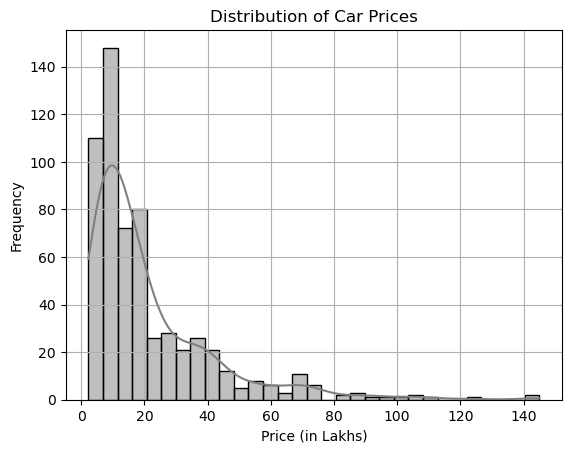

In [92]:
sns.histplot(df["Price(in_Lakhs)"],kde=True,color='grey')
plt.title("Distribution of Car Prices")
plt.xlabel('Price (in Lakhs)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

#### Observations
- By analysing the above graph we can say that most of the car prices are in between 0-20 lakhs
- The data is **right-skewed**, which is indicating that most cars are priced in the lower range, with a few cars being very expensive (outliers toward the right).
- A small but significant portion of the cars are priced much higher, reaching up to 140+ lakhs(long tail), though this segment represents fewer cars.

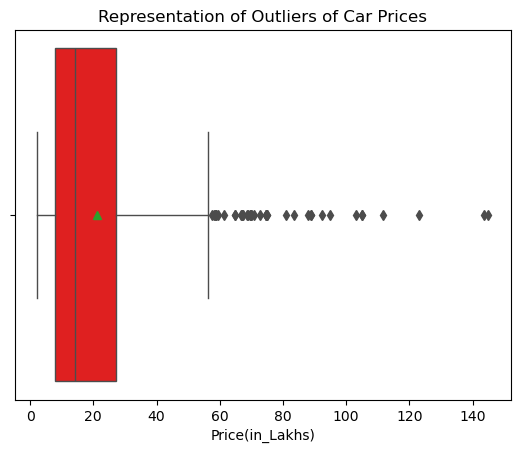

In [93]:
#boxplot
sns.boxplot(x='Price(in_Lakhs)',data=df,width=0.9,linewidth=1,color="red",showmeans=True)
plt.title("Representation of Outliers of Car Prices")
plt.show();

In [94]:
print(df['Price(in_Lakhs)'].describe())
q3=df['Price(in_Lakhs)'].describe()[6]
q1=df['Price(in_Lakhs)'].describe()[4]
print('IQR\t',q3-q1)

count    597.000000
mean      21.225135
std       20.638368
min        2.290000
25%        7.750000
50%       14.100000
75%       27.250000
max      145.000000
Name: Price(in_Lakhs), dtype: float64
IQR	 19.5


#### Observations
- The majority(50%) of car prices are concentrated between 10 and 30 lakhs, as shown by the width of the red box and IQR is small.
- As we seen earlier, the data is heavily right-skewed (as upper whisker is longer than lower), with most cars priced lower (below 30 lakhs), but there are several high-end cars that are significantly more expensive.
- Mean >> Median, and there are many outliners which affects the average price.
- There are many high-value cars that fall into the outlier range, with prices above 60 lakhs.
- Most cars are moderately priced, a small segment of high-end cars drives the overall average price up.

#### KMs_Driven

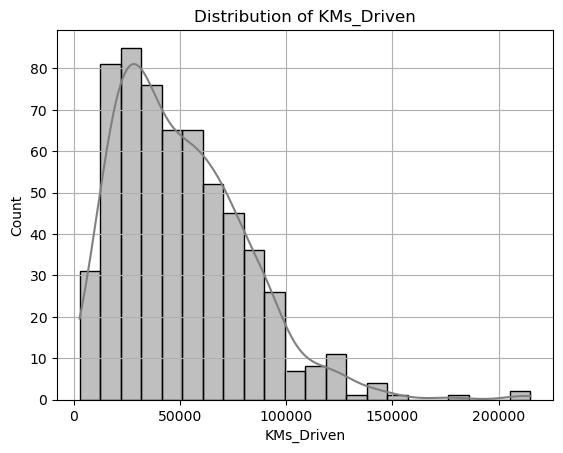

In [96]:
# Distribution PLot
sns.histplot(df["KMs_Driven"],color='grey',kde=True)
plt.title("Distribution of KMs_Driven")
plt.grid()
plt.show()

#### Observations
- Most of the cars have been driven between (10,000 - 60,000) kms, this indicates that the majority of cars in this dataset are relatively lightly used
- And after about 50,000 kilometers, the frequency of cars with higher mileage decreases significantly, with only a few cars having driven more than 100,000 kilometers.
- It is right-skewed with potential outliers on right side, indicating that the majority of cars are in the lower kilometer range, a small portion of cars has significantly higher mileage, pulling the tail to the right.
- This distribution suggests that the cars are mostly moderately used, with only a few high-mileage vehicles in the dataset.

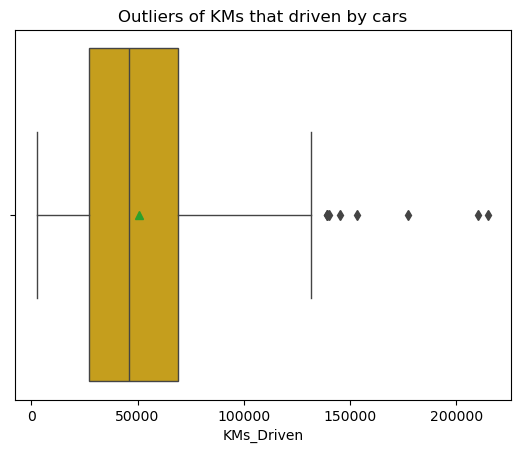

In [97]:
#boxplot
sns.boxplot(x="KMs_Driven",data=df,width=0.9,linewidth=1,color="#e1ad01",showmeans=True)
plt.title("Outliers of KMs that driven by cars")
plt.show();

In [98]:
print(df['KMs_Driven'].describe())
q3=df['KMs_Driven'].describe()[6]
q1=df['KMs_Driven'].describe()[4]
print('IQR\t',q3-q1)

count       597.000000
mean      50835.594640
std       30729.152228
min        2856.000000
25%       27000.000000
50%       46000.000000
75%       69020.000000
max      215000.000000
Name: KMs_Driven, dtype: float64
IQR	 42020.0


#### Observations
- The majority(50%) of cars have been driven between roughly 30,000 - 65,000 KMs, as shown by the width of the yellow box.
- It is slightly right-skewed, as the upper whisker is longer than the lower whisker.
- Mean > Median, and there are few outliners on right with cars driven greater than 1,40,000 KMs.
- The outliers on the right side of the plot a small number of vehicles have driven significantly more kilometers than the majority.
- Most cars have driven moderately , a small segment of cars are driven more.

#### Year of Manufacture

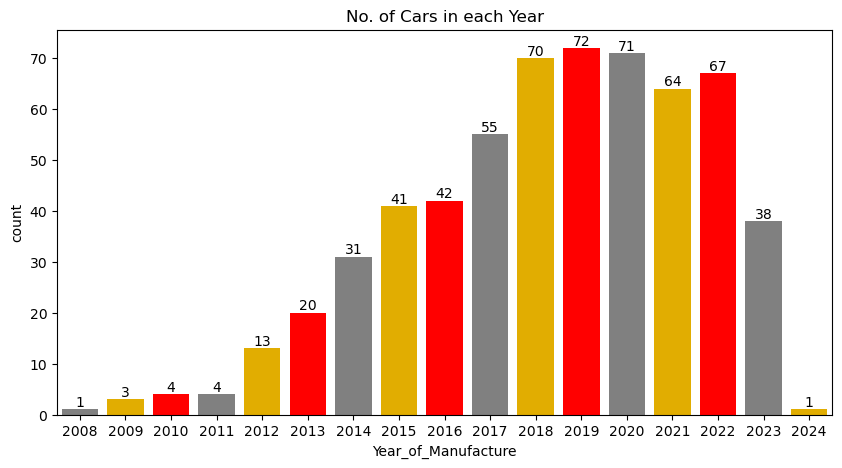

In [99]:
#count plot
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(ax=ax,x="Year_of_Manufacture",data=df,color="yellow",saturation=1,palette=colors)
ax.bar_label(ax.containers[0])
plt.title("No. of Cars in each Year")
plt.show();

#### Observations:
- The years 2017, 2018, and 2019 have the highest number of cars listed and there are lesser cars listed as we go back in time
- The decreasing trend in older models suggests that demand for them might be lower, or they might be reaching the end of their useful life.

#### Brand

In [101]:
df.Brand.nunique()

24

In [102]:
brands = df['Brand'].value_counts()

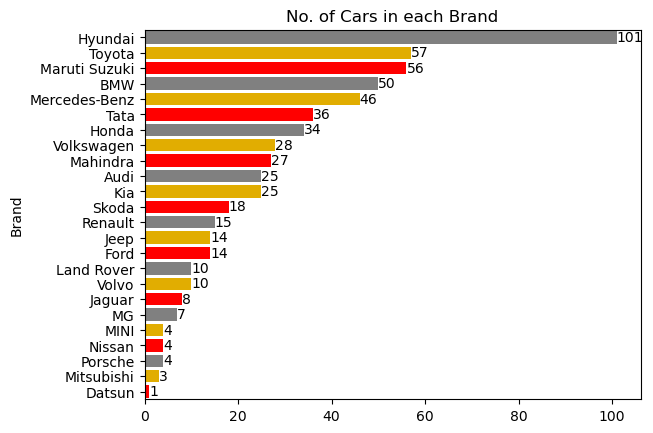

In [103]:
#count plot
ax = sns.barplot(data=df,x=brands.values, y=brands.index,orient='h',saturation=1,palette=colors)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("No. of Cars in each Brand")
plt.show()

In [104]:
k = df["Brand"].value_counts()[:8]
k['others'] = df["Brand"].value_counts()[8:].sum()

In [127]:
df["Brand"].unique()

array(['Mahindra', 'Tata', 'BMW', 'Maruti Suzuki', 'Toyota', 'Ford',
       'Volkswagen', 'Honda', 'Hyundai', 'Renault', 'Kia', 'Jeep',
       'Skoda', 'Mercedes-Benz', 'MINI', 'Audi', 'Mitsubishi',
       'Land Rover', 'Volvo', 'Nissan', 'MG', 'Jaguar', 'Porsche',
       'Datsun'], dtype=object)

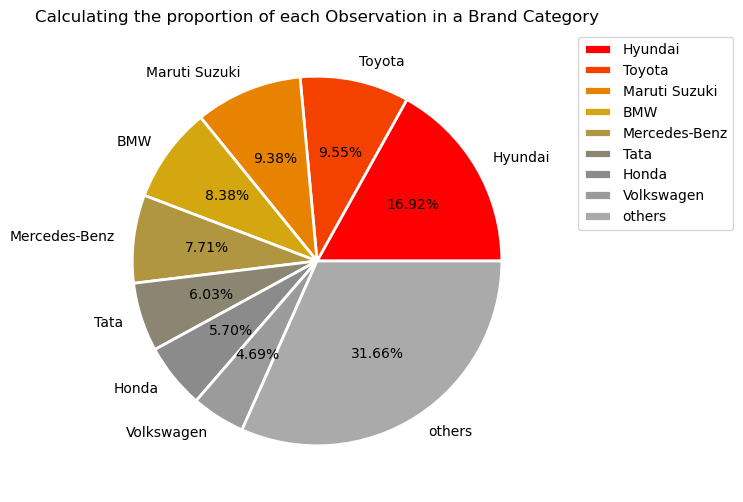

In [105]:
#Pie Chart
plt.figure(figsize=(6,6))
colors_pie=sns.color_palette('blend:red,#e1ad01,grey,#AAAAAA',n_colors=9)
plt.pie(k,autopct="%.2f%%",wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},labels =k.index,colors=colors_pie,)
plt.title("Calculating the proportion of each Observation in a Brand Category")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

#### Fuel Type

In [106]:
df['Fuel_Type'].nunique()

8

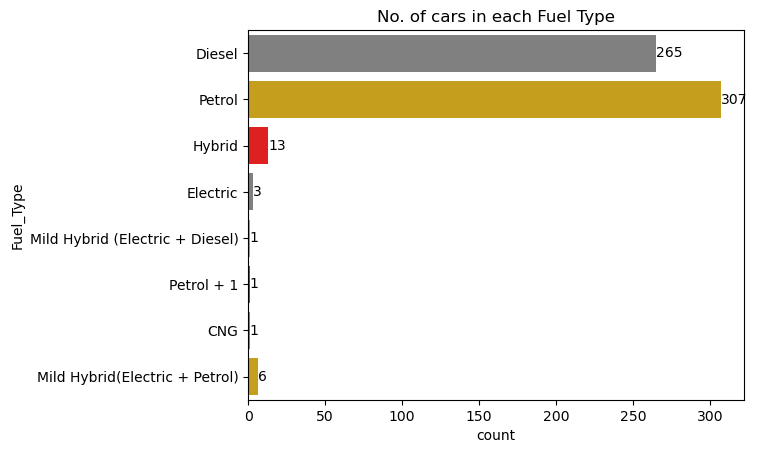

In [107]:
ax = sns.countplot(y="Fuel_Type",data=df,orient='h',palette=colors)
ax.bar_label(ax.containers[0])
plt.title("No. of cars in each Fuel Type")
plt.show()

In [108]:
fuel = df['Fuel_Type'].value_counts()[:3]
fuel['others'] = df['Fuel_Type'].value_counts()[3:].sum()
fuel

Fuel_Type
Petrol    307
Diesel    265
Hybrid     13
others     12
Name: count, dtype: int64

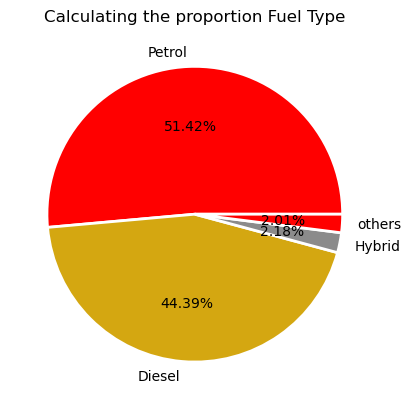

In [109]:
colors_pie2 = colors_pie[0:9:3]
plt.pie(fuel,autopct="%.2f%%",wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},labels=fuel.index,colors=colors_pie2)
plt.title("Calculating the proportion Fuel Type")
plt.show()

#### Observations:
- There are 8 fuel types listed in the data.
- 95% of cars are of Petrol and Diesel.
- There are more Petrol cars followed by Diesel cars with a slight difference of 42 cars
- Others include 5 fuel types occupying a share of 2.01%, have fewer listings, indicating fewer models available in the used car market

#### Car Age Category

In [110]:
cat=df['Car_Age_Category'].value_counts()
cat

Car_Age_Category
Moderate    332
Old         159
New         106
Name: count, dtype: int64

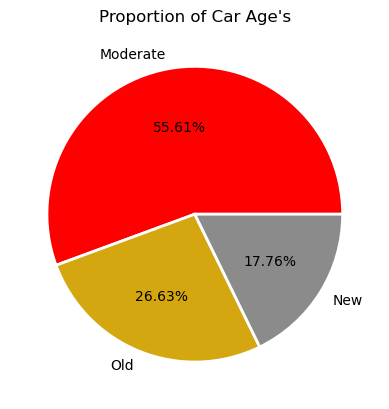

In [111]:
ax = plt.pie(cat,autopct="%.2f%%",wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},labels=cat.index,colors=colors_pie2)
plt.title("Proportion of Car Age's")
plt.show()

#### Observations:
- Moderate (i.e, Cars aged 3-8 years) are listed more with 332 cars occupying 55.61% followed by Old (> 8 years) and new(< 3 years).

#### Location

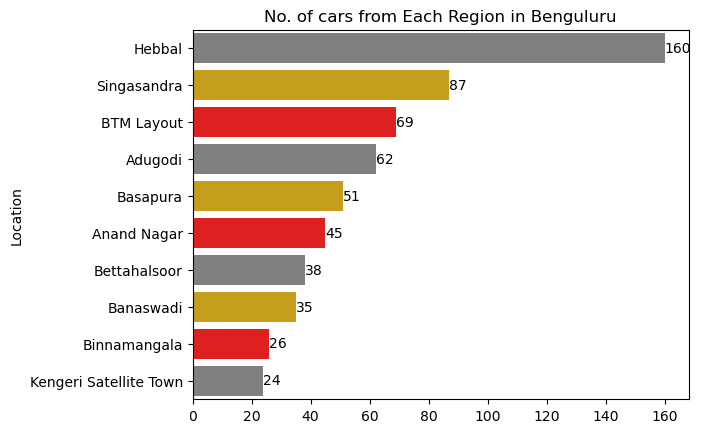

In [112]:
#bar plot
loc=df['Location'].value_counts()
ax = sns.barplot(x=loc.values, y=loc.index,palette=colors)
ax.bar_label(ax.containers[0])
plt.title("No. of cars from each Region in Benguluru")
plt.show();

#### Observations:
- Hebbal has the most used cars listed followed by Singasandra, BTM Layout, Adugodi, and Basapura 

## Bivariate Analysis

### Numerical vs Numerical
#### KMs Driven vs Price(in Lakhs)

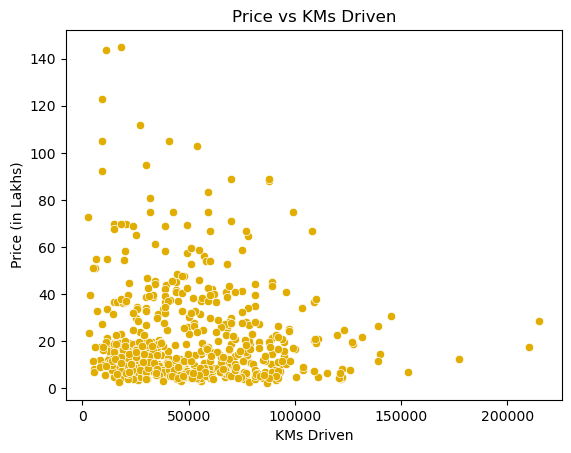

In [36]:
#scatterplot
sns.scatterplot(x=df['KMs_Driven'], y=df['Price(in_Lakhs)'],color='#e1ad01')
plt.xlabel('KMs Driven')
plt.ylabel('Price (in Lakhs)'
plt.title('Price vs KMs Driven'))
plt.show()

In [37]:
correlation = df[['KMs_Driven', 'Price(in_Lakhs)']].corr()
print(correlation)

                 KMs_Driven  Price(in_Lakhs)
KMs_Driven         1.000000        -0.088139
Price(in_Lakhs)   -0.088139         1.000000


#### Observations:
- There seems to be a slight negative correlation between price and distance. This suggests that, generally, cars with higher mileage tend to have lower prices.
- While there is a general trend for prices to decrease with higher mileage, the relationship is not very strong.

#### Year of Manufacture vs Price(in Lakhs)

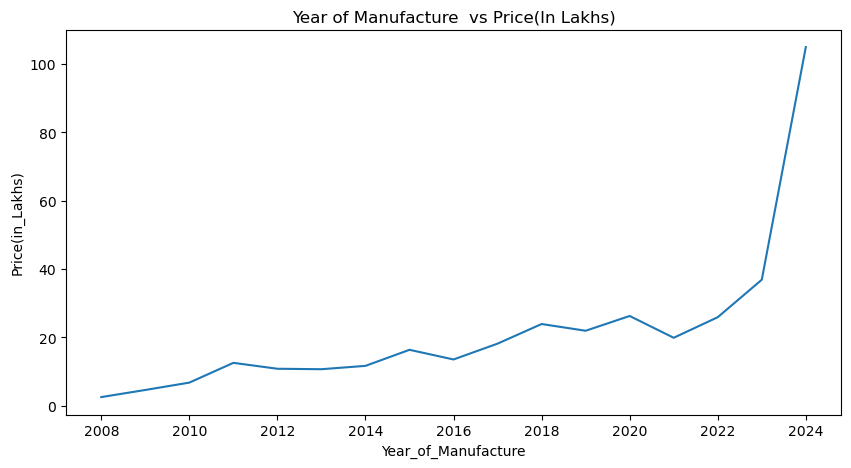

In [114]:
fig,ax=plt.subplots(figsize=(10,5))
sns.lineplot(x=df['Year_of_Manufacture'],y="Price(in_Lakhs)",data=df,palette=colors_pie, ci=None)
plt.title("Year of Manufacture  vs Price(In Lakhs)")
plt.show();

In [39]:
correlation = df[['Year_of_Manufacture', 'Price(in_Lakhs)']].corr()
print(correlation)

                     Year_of_Manufacture  Price(in_Lakhs)
Year_of_Manufacture              1.00000          0.28871
Price(in_Lakhs)                  0.28871          1.00000


#### Observations:
- As the year of manufacture progresses, the median price and overall price distribution tend to shift upwards.
- Year of Manufacture does have a significant impact on price. Newer models generally command higher prices compared to older models.

#### Year of Manufacture vs KMs Driven

Text(0.5, 1.0, 'Comparision between Year of Manufacture and KMs Driven')

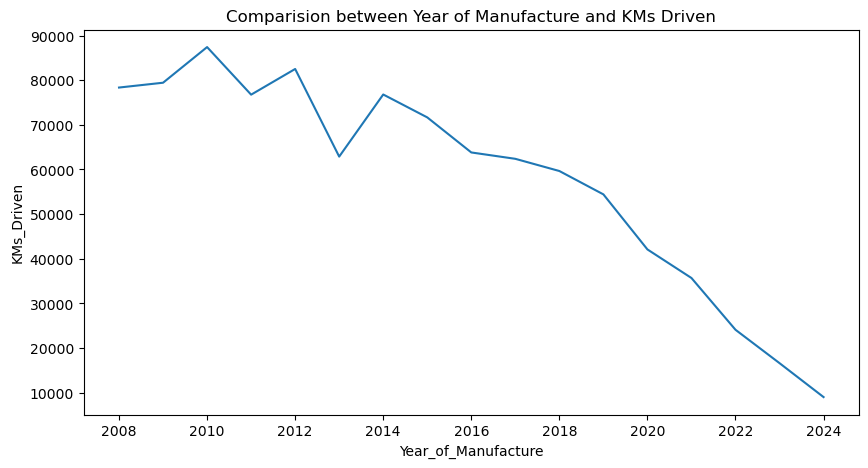

In [40]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(df, x = df['Year_of_Manufacture'], y = df['KMs_Driven'],ci=None)
plt.title("Relation between Year of Manufacture and KMs Driven")
plt.show()

#### Observations:
-  There is a general decreasing trend in the kilometers driven as the year of manufacture increases. This suggests that newer cars tend to have lower overall mileage compared to older cars.
-  There is a significant drop in kilometers driven between the years 2018 and 2020. This could be due to various factors such as changes in driving habits or the introduction of new car models with improved fuel efficiency.

### Categorical vs Numerical

#### Fuel Type vs Price(in Lakhs)

In [41]:
df.groupby('Fuel_Type')['Price(in_Lakhs)'].mean()

Fuel_Type
CNG                                  9.250000
Diesel                              28.988439
Electric                            32.903333
Hybrid                              36.706923
Mild Hybrid (Electric + Diesel)    143.750000
Mild Hybrid(Electric + Petrol)      16.458333
Petrol                              13.459509
Petrol + 1                          29.750000
Name: Price(in_Lakhs), dtype: float64

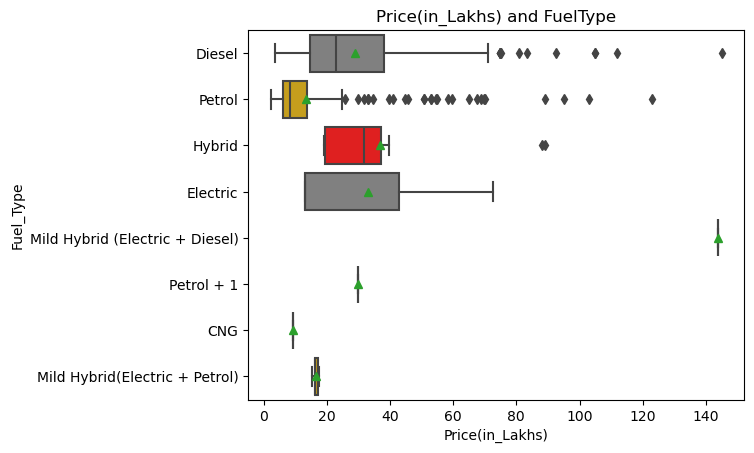

In [115]:
sns.boxplot(df, x = df['Price(in_Lakhs)'], y = 'Fuel_Type',showmeans=True,palette=colors)
plt.title("Price(in_Lakhs) and FuelType")
plt.show()

#### Observations:
-  The diesel cars tend to be more expensive than other fuel types, followed by hybrid and electric cars.
-  Petrol cars come in a variety of prices, and some of them are cheaper than diesel or hybrid cars.
-  CNG cars are the cheapest option, but they not be able to find everywhere, and they might not go as far on a full tank as other cars.

#### Brand vs Price(in Lakhs)

In [43]:
brand_price = round(df.groupby('Brand')['Price(in_Lakhs)'].mean().sort_values(ascending=False),2)
brand_price

Brand
Porsche          74.19
Land Rover       52.89
Mercedes-Benz    51.53
BMW              44.05
Volvo            38.86
Jeep             30.18
Audi             26.72
Toyota           25.79
Jaguar           23.14
MINI             22.32
MG               18.14
Kia              17.62
Mahindra         14.84
Skoda            14.66
Ford             14.48
Mitsubishi       13.70
Volkswagen       13.68
Tata             11.58
Hyundai           9.90
Maruti Suzuki     7.53
Honda             6.67
Renault           6.57
Nissan            5.90
Datsun            3.20
Name: Price(in_Lakhs), dtype: float64

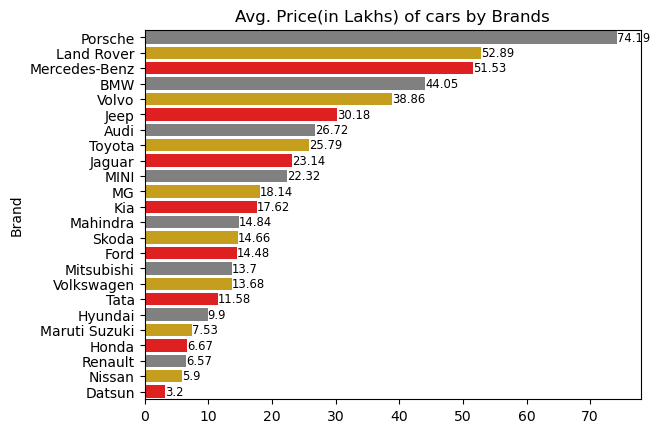

In [44]:
ax = sns.barplot(df, x = brand_price.values, y = brand_price.index,palette=colors)
ax.bar_label(ax.containers[0],size='small')
plt.title('Avg. Price(in Lakhs) of cars by Brands')
plt.show()

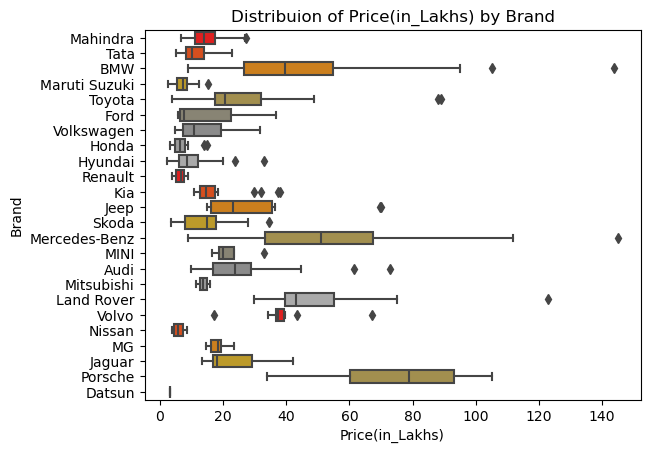

In [117]:
sns.boxplot(df, x = df['Price(in_Lakhs)'], y = 'Brand',palette=colors_pie)
plt.title("Distribuion of Price(in_Lakhs) by Brand")
plt.show()

#### Car Age Category vs Price(in Lakhs)

Text(0.5, 1.0, 'Distribuion of Price(in Lakhs) by age categories')

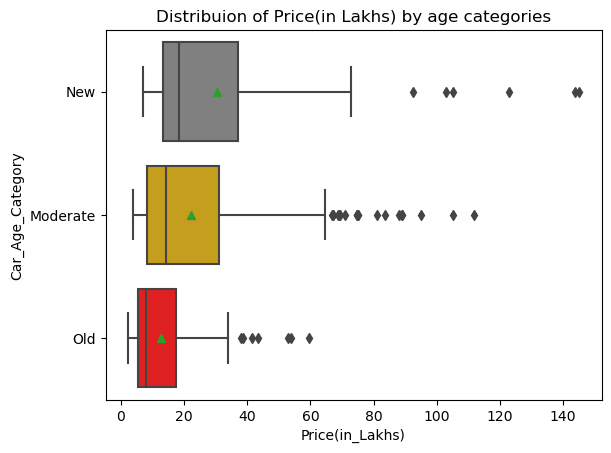

In [46]:
sns.boxplot(df, x = df['Price(in_Lakhs)'], y = df['Car_Age_Category'],showmeans=True,palette=colors)
plt.title('Distribuion of Price(in Lakhs) by age categories')

##### Observation
* The boxplot shows the distribution of car prices across different age categories (New, Moderate, and Old).
* New cars have the highest price range, with several outliers above ₹100 lakhs. Moderate-aged cars have a more concentrated price distribution with fewer extreme values, while old cars are priced significantly lower, generally under ₹20 lakhs, with a few outliers.
-  New: New cars generally have a higher price range compared to older cars. The median price for new cars is around 80 lakhs, with a significant number of cars priced above 100 lakhs.
-  Moderate: Moderate-aged cars have a price range that overlaps with both new and old cars. The median price is around 40 lakhs, with a relatively narrow distribution.
-  Old: Old cars have the lowest price range, with the median price around 20 lakhs. The majority of old cars are priced below 40 lakhs.
* The trend suggests that price decreases as the car ages, but there are a few exceptions in each category.

#### Location vs Price(in Lakhs)

In [47]:
location_price = round(df.groupby('Location')['Price(in_Lakhs)'].mean().sort_values(ascending=False),2)
location_price

Location
Hebbal                    35.28
Binnamangala              27.70
BTM Layout                26.63
Adugodi                   22.14
Kengeri Satellite Town    20.55
Singasandra               13.39
Basapura                  10.07
Anand Nagar                9.12
Bettahalsoor               8.15
Banaswadi                  5.87
Name: Price(in_Lakhs), dtype: float64

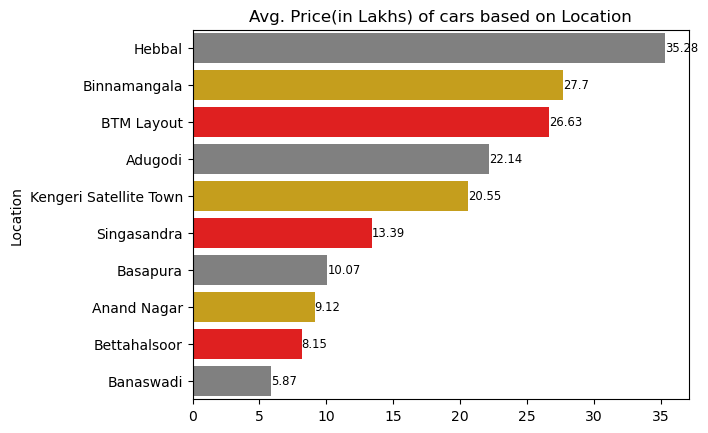

In [48]:
ax = sns.barplot(df, x = location_price.values, y = location_price.index,palette=colors)
ax.bar_label(ax.containers[0],size='small')
plt.title('Avg. Price(in Lakhs) of cars based on Location')
plt.show()

#### Fuel Type vs KMs Driven

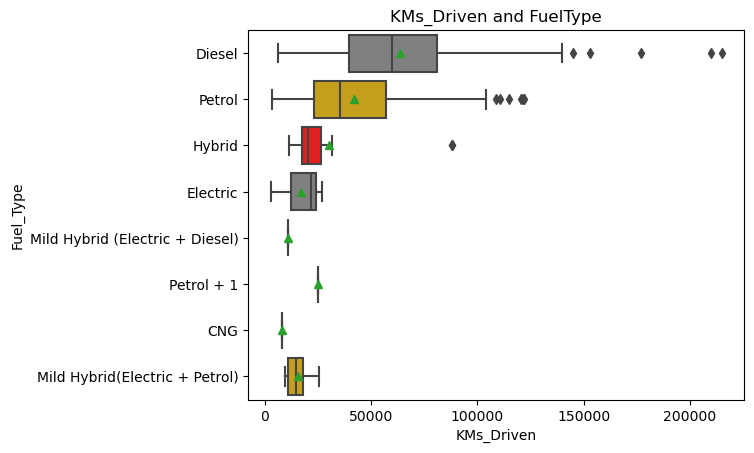

In [118]:
sns.boxplot(df, x = df['KMs_Driven'], y = 'Fuel_Type',showmeans=True,palette=colors)
plt.title("KMs_Driven and FuelType")
plt.show()

#### observation:
- Diesel: Diesel cars generally have a higher range of kilometers driven compared to other fuel types.
- Petrol: Petrol cars exhibit a wider range of kilometers driven than diesel cars. The median kilometers driven is around 50,000.
- Hybrid: Hybrid cars have a price range that overlaps with both petrol and diesel cars
- Electric: Electric cars have a relatively narrow range of kilometers driven, with the median around 50,000. The majority of electric cars are driven between 25,000 and 75,000 kilometers.

#### Brand vs KMs


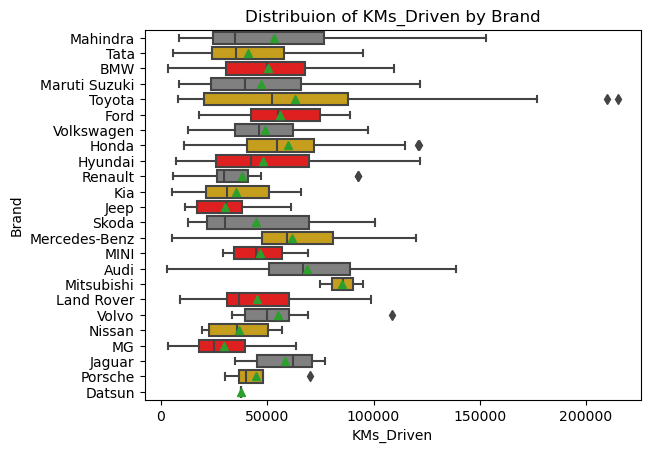

In [128]:
sns.boxplot(df, x = df['KMs_Driven'], y = df['Brand'],palette=colors, showmeans=True)
plt.title("Distribuion of KMs_Driven by Brand")
plt.show()

##### Observation
* The boxplot shows the distribution of kilometers driven for various car brands. Brands like Mahindra, Tata, and BMW have wider spreads, indicating higher variability in kilometers driven.
* Some outliers are present, particularly in brands like Ford, Honda, and Nissan, where certain cars have been driven significantly more than others.
- The whiskers for Toyota are quite long other than Mahindra and followed by Audi.So Toyota cars are driven a lot, while others are not driven as much.
- Hyundai, Renault, Kia, Jeep, Maruti Suzuki, and Skoda have a moderate range of kilometers driven, as indicated by their shorter whiskers.     
* Overall, most brands have median values well below 100,000 kilometers driven, with exceptions such as Mahindra and Tata having higher medians.

#### Car Age Category vs KMs Driven

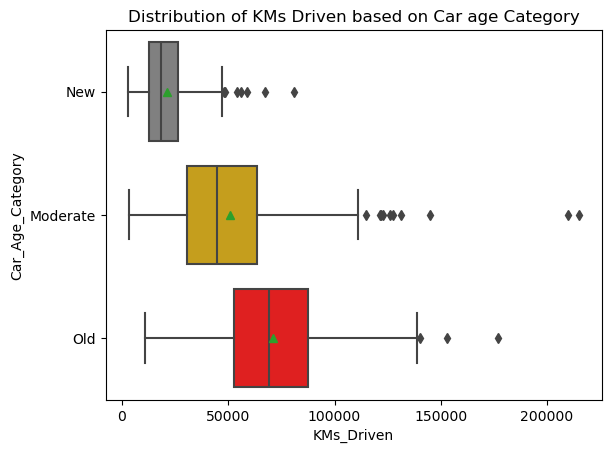

In [51]:
ax = sns.boxplot(df, x = df['KMs_Driven'], y = df['Car_Age_Category'],showmeans=True,palette=colors)
plt.title('Distribution of KMs Driven based on Car age Category')
plt.show()

##### Observation
* The boxplot shows the distribution of KMs driven across different car age categories.
* Newer cars tend to have a smaller range of kilometers driven, with several outliers indicating that some new cars have been driven much further than average.
* Moderately aged cars have a wider range, suggesting more variability in usage, while older cars generally show lower kilometers driven, but also have a few high outliers. The means and medians indicate that newer cars, on average, are driven less than older cars.

#### Location vs KMs

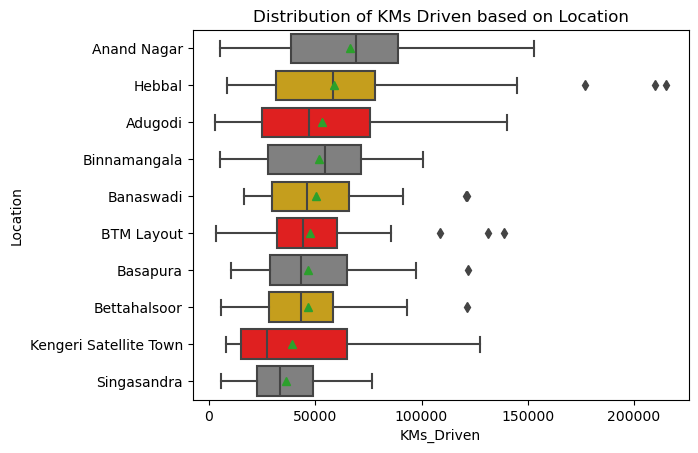

In [52]:
mean_kms_driven = df.groupby('Location')['KMs_Driven'].mean()
sorted_locations = mean_kms_driven.sort_values(ascending=False).index.tolist()
ax = sns.boxplot(df, x = df['KMs_Driven'], y = df['Location'],order=sorted_locations,showmeans=True,palette=colors)
plt.title('Distribution of KMs Driven based on Location')
plt.show()

##### Observation
* The boxplot shows the distribution of KMs driven across different locations. The median distance driven varies by location, with Anand Nagar having the highest median, followed by Hebbal.
* There are several outliers in locations like BTM Layout, Bettahalsoor, and Kengeri Satellite Town, indicating that some vehicles in these areas have driven significantly more kilometers than others.
* The variation in distances driven is more spread out in some locations (like Banaswadi) compared to others, where the distribution is tighter.

### Categorical vs Categorical
#### Brand vs Fuel

In [53]:
df["Fuel_Type"].unique()

array(['Diesel', 'Petrol', 'Hybrid', 'Electric',
       'Mild Hybrid (Electric + Diesel)', 'Petrol + 1', 'CNG',
       'Mild Hybrid(Electric + Petrol)'], dtype=object)

In [54]:
pd.crosstab(df["Brand"],df["Fuel_Type"])

Fuel_Type,CNG,Diesel,Electric,Hybrid,Mild Hybrid (Electric + Diesel),Mild Hybrid(Electric + Petrol),Petrol,Petrol + 1
Brand,,,,,,,,
Audi,0,21,1,0,0,0,3,0
BMW,0,43,0,0,1,0,6,0
Datsun,0,0,0,0,0,0,1,0
Ford,0,6,0,0,0,0,8,0
Honda,0,2,0,0,0,0,32,0
Hyundai,0,17,0,0,0,0,84,0
Jaguar,0,8,0,0,0,0,0,0
Jeep,0,7,0,0,0,0,7,0
Kia,0,11,0,0,0,0,14,0


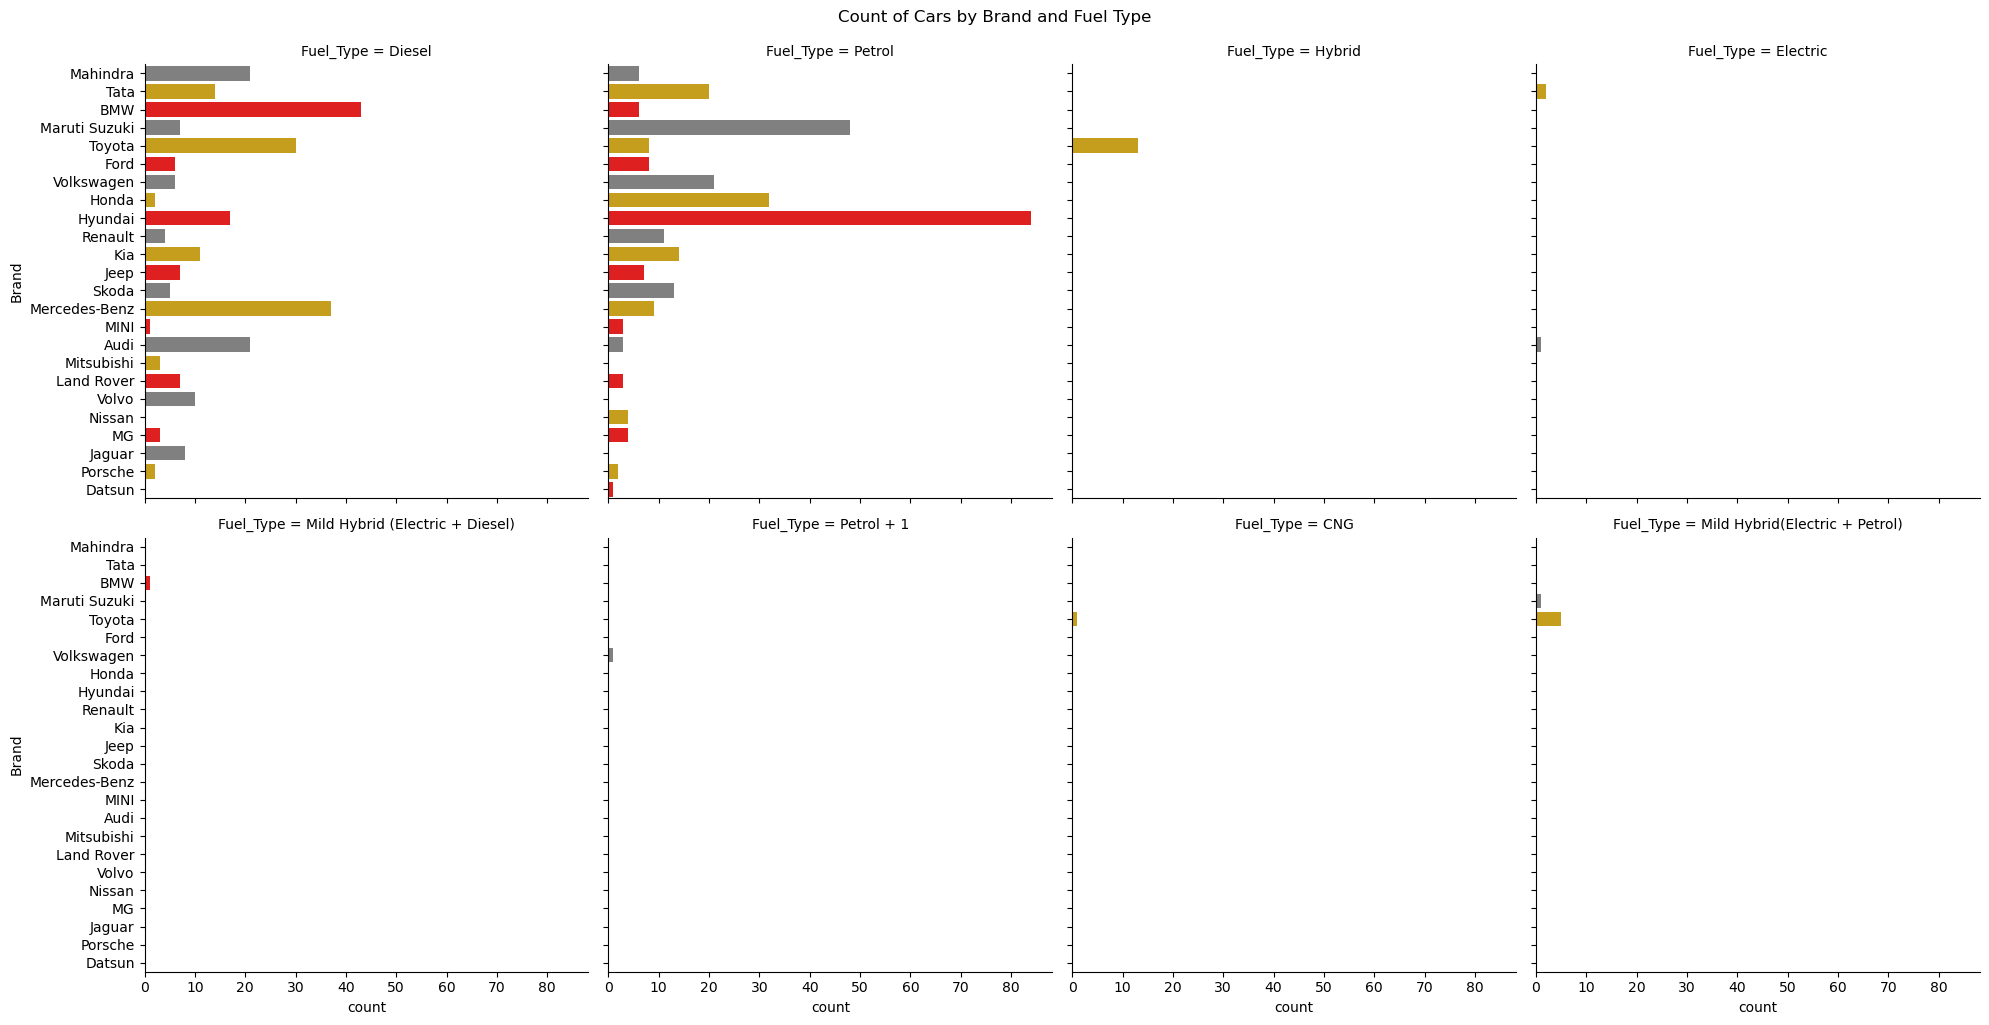

In [124]:
sns.catplot(df,col='Fuel_Type',y='Brand',kind='count',col_wrap=4,palette=colors)
plt.suptitle('Count of Cars by Brand and Fuel Type', y=1.02)
plt.show()

#### **Observations:**
* The data visualized in the bar plots shows the distribution of cars by brand and fuel type.
* The most common fuel types appears to be Petrol and Diesel, with Maruti Suzuki, Hyundai having a significant number of Petrol cars and BMW, Mercedez-Benz having significant Diesal cars in this category.
* Other fuel types such as Hybrid and Electric have fewer occurrences, with only a few brands like Toyota having notable counts for Hybrid.
* Some fuel types, like CNG show minimal or no data.
* The graph highlights clear distinctions in fuel preferences among different car brands.

#### Fuel vs Age

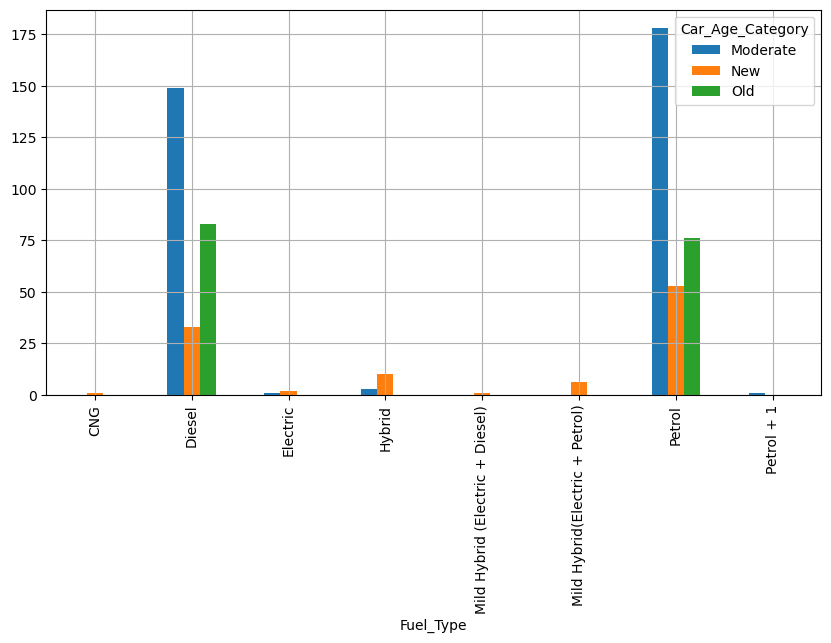

In [126]:
fig,ax=plt.subplots(figsize=(10,5))
pd.crosstab(df["Fuel_Type"],df['Car_Age_Category']).plot(kind="bar",ax=ax)
plt.grid()
plt.show()

##### **Observation**
* The bar plot shows the distribution of car age categories (new, moderate, old) across various fuel types for second-hand cars. Diesel and petrol vehicles dominate the market, with most being moderate-aged. Petrol cars also have a considerable number of new and old models. Electric, hybrid, and CNG vehicles are significantly fewer in number, indicating a lower presence in the second-hand market.

#### Age vs Location

In [57]:
pd.crosstab

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins: 'bool' = False, margins_name: 'Hashable' = 'All', dropna: 'bool' = True, normalize: 'bool' = False) -> 'DataFrame'>

In [58]:
pd.crosstab(df['Location'],df["Car_Age_Category"])

Car_Age_Category,Moderate,New,Old
Location,,,
Adugodi,35,11,16
Anand Nagar,25,5,15
BTM Layout,36,11,22
Banaswadi,21,2,12
Basapura,30,9,12
Bettahalsoor,20,4,14
Binnamangala,11,6,9
Hebbal,90,22,48
Kengeri Satellite Town,6,18,0


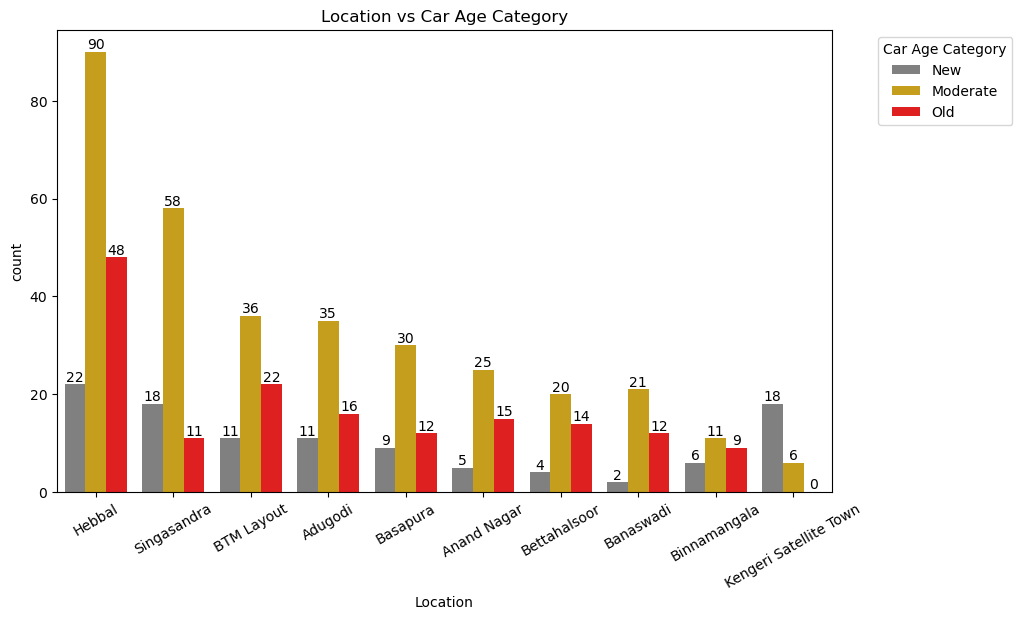

In [59]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Location', hue='Car_Age_Category', order=df['Location'].value_counts().index,palette=colors)
plt.title('Location vs Car Age Category')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.xticks(rotation=30)
plt.legend(title='Car Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### **Observation**
* The bar plot shows the distribution of second-hand cars across different locations in Bengaluru categorized by car age (new, moderate, and old). Hebbal has the highest count of cars, with a significant portion being new and moderate-aged vehicles. Similarly, Singasandra and BTM Layout also show a higher concentration of new and moderate-aged cars, while other locations like Basapura and Anand Nagar have fewer old vehicles in com

#### Fuel vs Location

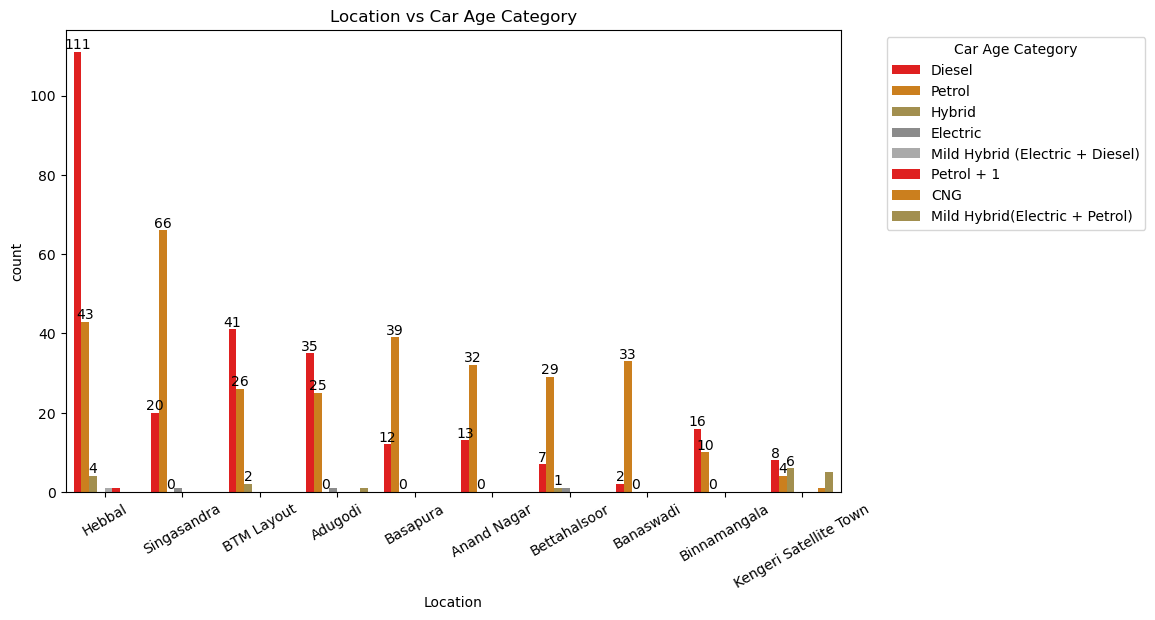

In [60]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Location', hue='Fuel_Type', order=df['Location'].value_counts().index,palette=colors_pie[::2])
plt.title('Location vs Car Age Category')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.xticks(rotation=30)
plt.legend(title='Car Age Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Observation
* The bar plot illustrates the distribution of different fuel types across various locations for second-hand cars in Bengaluru. Diesel and petrol cars are the most common, with the highest counts in several locations, particularly in 'Singasandra' and 'Hebbal'. Electric, hybrid, and CNG cars have much lower counts, indicating limited availability in these categories.

### Multi-Variant Analysis  

                     Year_of_Manufacture  KMs_Driven  Price(in_Lakhs)
Year_of_Manufacture             1.000000   -0.560668         0.288710
KMs_Driven                     -0.560668    1.000000        -0.088139
Price(in_Lakhs)                 0.288710   -0.088139         1.000000


<Axes: >

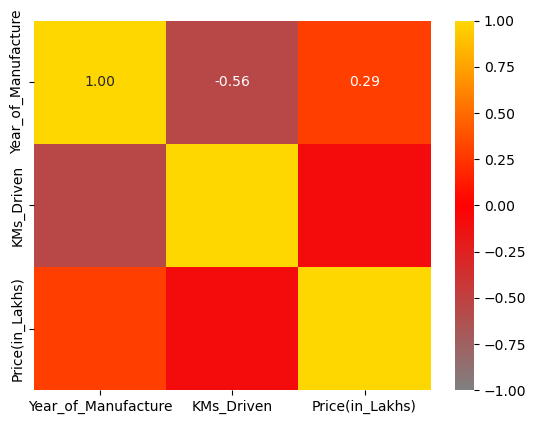

In [61]:
# Correlation matrix for numerical variables
correlation_matrix = df[['Year_of_Manufacture', 'KMs_Driven', 'Price(in_Lakhs)']].corr()

# Display the correlation matrix
print(correlation_matrix)
colors_map=sns.color_palette('blend:grey,red,gold',as_cmap=True)
sns.heatmap(correlation_matrix,annot=True,vmin=-1,vmax=1,fmt='.2f',cmap=colors_map)

#### Observations:
- There is a strong negative correlation between Year of Manufacture and KMs Driven indicating Older cars has driven more.
- A positive correlation between Price and Year of Manufacture would show that newer cars tend to have higher prices.
- There is slight negative correlation between Price and KMs Driven might indicate that cars more KMs Driven tend to have lower prices.

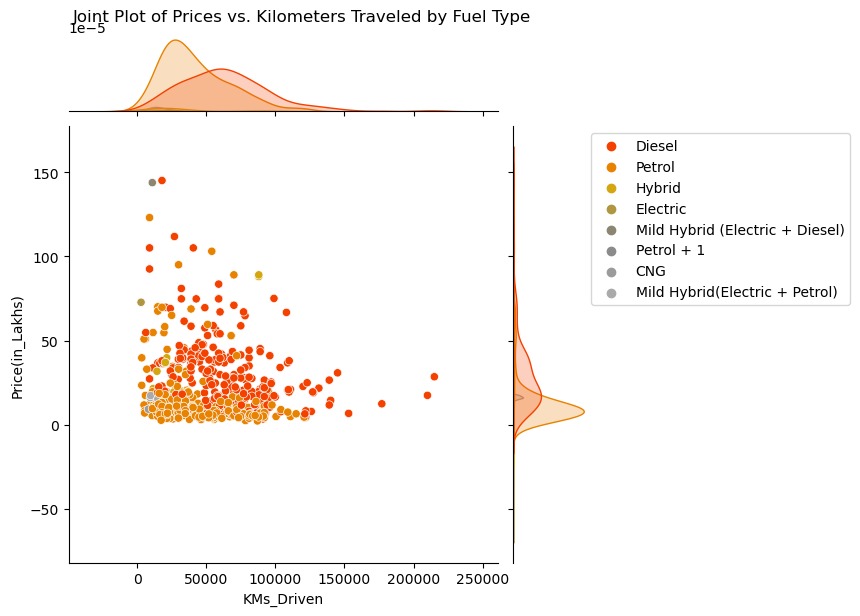

In [62]:
sns.jointplot(x=df['KMs_Driven'], y=df['Price(in_Lakhs)'],hue='Fuel_Type', data=df,palette=colors_pie[1:])
plt.suptitle('Joint Plot of Prices vs. Kilometers Traveled by Fuel Type', y=1.02)
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper left')
plt.show()

##### **Observation**
* The joint plot shows the relationship between car prices and kilometers driven, categorized by fuel type. Most cars are concentrated at lower price ranges (below 50 lakhs) and have driven under 100,000 kilometers. Diesel and petrol cars dominate the dataset, while hybrids and electric cars are sparsely distributed, indicating their lower prevalence in used cars for sale.

In [63]:
k = pd.pivot_table(df, index='Brand', columns='Fuel_Type', values='Price(in_Lakhs)',aggfunc='mean')
k.fillna('-')

Fuel_Type,CNG,Diesel,Electric,Hybrid,Mild Hybrid (Electric + Diesel),Mild Hybrid(Electric + Petrol),Petrol,Petrol + 1
Brand,,,,,,,,
Audi,-,24.486666,72.72,-,-,-,27.0,-
BMW,-,39.737674,-,-,143.75,-,58.35,-
Datsun,-,-,-,-,-,-,3.2,-
Ford,-,23.591667,-,-,-,-,7.653954,-
Honda,-,6.5,-,-,-,-,6.685418,-
Hyundai,-,14.191359,-,-,-,-,9.029245,-
Jaguar,-,23.1375,-,-,-,-,-,-
Jeep,-,29.028571,-,-,-,-,31.321429,-
Kia,-,22.086364,-,-,-,-,14.103354,-


#### Brand vs Year of Manufacture vs Price(in_Lakhs)

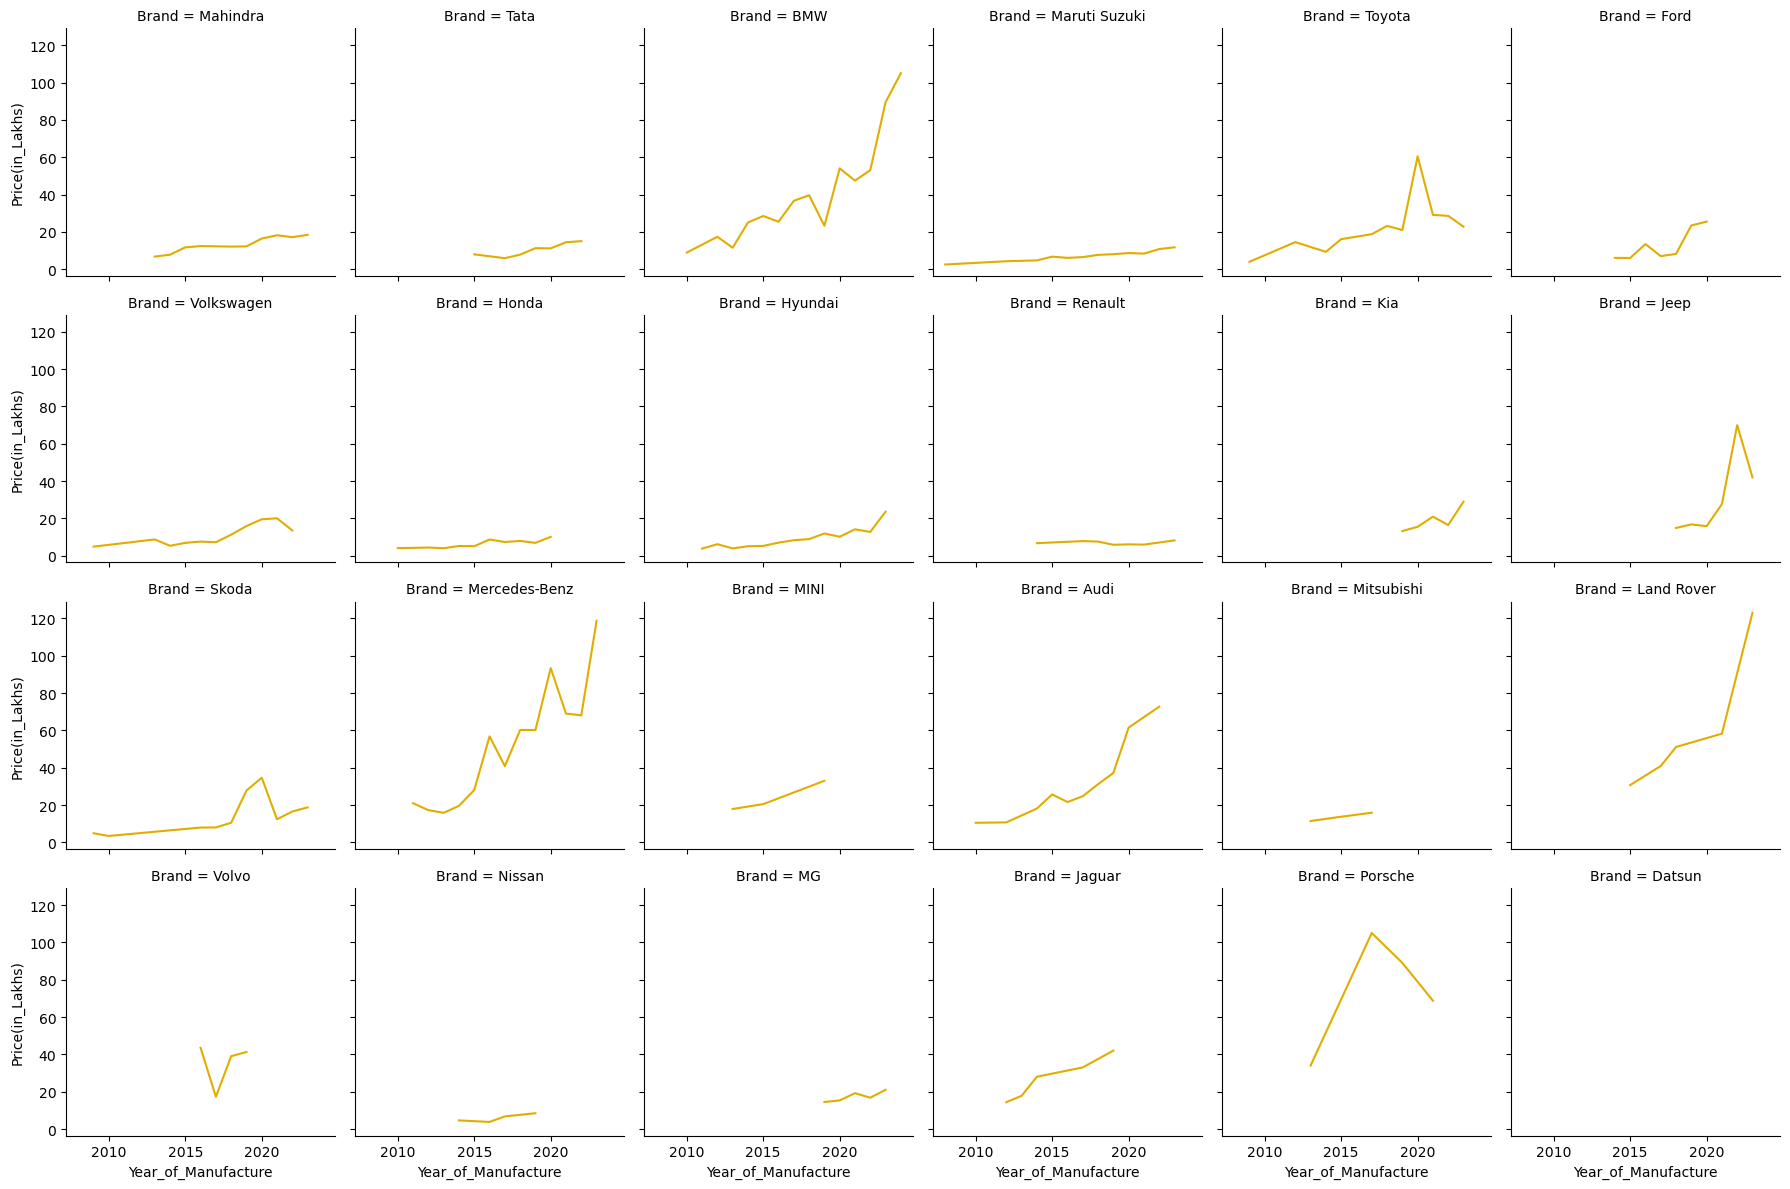

In [64]:
g = sns.FacetGrid(df, col="Brand", col_wrap=6, height=3)
g.map(sns.lineplot, "Year_of_Manufacture", "Price(in_Lakhs)",ci=None,color='#e1ad01')
plt.show()

- Brands like BMW, Mercedes Benz, Audi, and Land Rover show a gradual steep increase in price over the years and brands like Mahindra, Tata, Maruti Suzuki, Volkswagen and Hyundai, the prices remain relatively stable over time.
-  Honda, Hyundai, Maruti Suzuki and Renault show little variation in price across different years. This might suggest that older used models from these brands have a consistent demand in the used car market, and prices stabilize after the initial depreciation period.
-  Luxury brands like BMW, Mercedes Benz, Audi, Jagur and Land Rover exhibit a slower depreciation rate in the used car market. These brands often maintain higher resale values due to their brand reputation, reliability, and desirability, even after several years.

### Scenario

#### 1. A person wants a car which has travelled less than 50 thousand Kilometers?

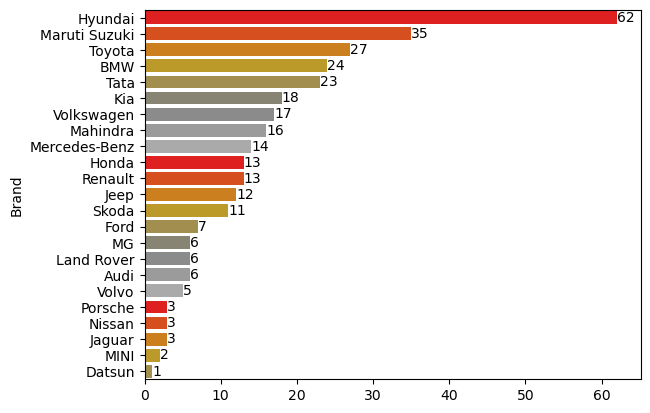

In [65]:
cd = df[df['KMs_Driven'] < 50000]
k = cd.groupby('Brand')['KMs_Driven'].count().sort_values(ascending=False)
ax=sns.barplot(y=k.index,x=k.values,palette=colors_pie)
ax.bar_label(ax.containers[0])
plt.show()

#### 2. A person wants to buy a second hand car with in a budget of 5 lakhs.  
   Suggest cars whose prices are under 5 lakhs

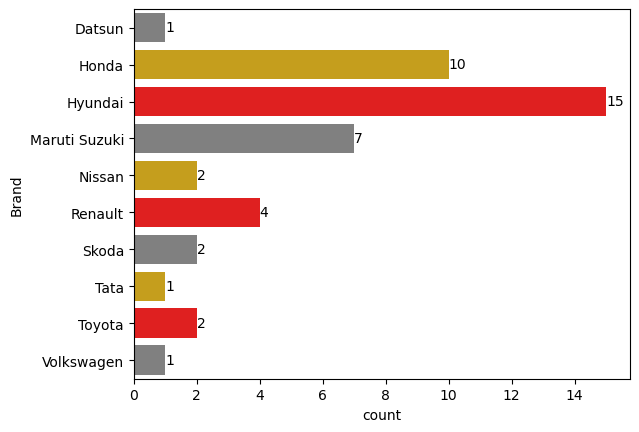

,Brand,Model,Year_of_Manufacture,Fuel_Type,KMs_Driven,Location,Car_Age_Category,Price(in_Lakhs)
413,Datsun,redi-GO T (O),2016,Petrol,37825,Bettahalsoor,Old,3.20000
409,Honda,City 1.5 V MT,2010,Petrol,121489,Bettahalsoor,Old,4.10000
526,Honda,City 1.5 S MT,2011,Petrol,92000,Anand Nagar,Old,4.25000
324,Honda,Brio V MT,2012,Petrol,54612,BTM Layout,Old,3.80000
590,Honda,City 1.5 S MT,2012,Petrol,87836,Basapura,Old,4.58000
284,Honda,City 1.5 V AT,2012,Petrol,110900,Adugodi,Old,4.86000
254,Honda,Brio EX MT,2013,Petrol,55685,Basapura,Old,3.17750
45,Honda,Brio S MT,2013,Petrol,26000,Adugodi,Old,3.48000
536,Honda,Amaze 1.2 EX i-VTEC,2014,Petrol,50911,Singasandra,Old,4.45000
573,Honda,City SV,2014,Petrol,120786,Banaswadi,Old,4.55650


In [66]:
cars = df[df['Price(in_Lakhs)']<=5].sort_values(['Brand','Year_of_Manufacture','Price(in_Lakhs)'])
#cars.groupby(['Brand','Fuel_Type','Car_Age_Category'])
ax=sns.countplot(y='Brand', data=cars, palette=colors)
ax.bar_label(ax.containers[0])
plt.show()
cars

#### 3. Based on User preferences Brand, Year, Fuel. Suggest average price of car

In [67]:
brands = sorted(list(df['Brand'].unique()))
fuels = sorted(list(df['Fuel_Type'].unique()))
print("Brands:")
for i, brand in enumerate(brands, 1):
    print(f"{i}. {brand}")
car_brand = input('Select your car brand of choice(e.g. Ford): ')
year = int(input('Select Year of Manufacture(2008-2024): '))
fuel = input('Select your fuel of choice: ')
error='no'
if (car_brand not in brands) | (year not in range(2008,2025)) | (fuel not in fuels):
    error = 'yes'
    if car_brand not in brands:
        print('Please choose a brand from above list of brands')
    elif year not in range(2008,2025):
        print('Please enter a year between 2008 and 2024')
    else:
        print('Please choose a fuel type from list of fuels')
if error == 'no':
    your_list = df[(df['Brand'] == car_brand) & (df['Year_of_Manufacture'] == year) & (df['Fuel_Type'] == fuel)].sort_values(by="Price(in_Lakhs)")
    avg_price = df[(df['Brand'] == car_brand) & (df['Year_of_Manufacture'] == year) & (df['Fuel_Type'] == fuel)]['Price(in_Lakhs)'].mean()   
    print('-'*60)
    print(f'\nAverage Price of {car_brand} {fuel} cars from {year} is {round(avg_price,2)} lakhs')
    print('-'*60)
    print(f'\nThere are {your_list.shape[0]} cars avaliable')
    display(your_list)

Brands:
1. Audi
2. BMW
3. Datsun
4. Ford
5. Honda
6. Hyundai
7. Jaguar
8. Jeep
9. Kia
10. Land Rover
11. MG
12. MINI
13. Mahindra
14. Maruti Suzuki
15. Mercedes-Benz
16. Mitsubishi
17. Nissan
18. Porsche
19. Renault
20. Skoda
21. Tata
22. Toyota
23. Volkswagen
24. Volvo


Select your car brand of choice(e.g. Ford):  Hyundai
Select Year of Manufacture(2008-2024):  2018
Select your fuel of choice:  Petrol


------------------------------------------------------------

Average Price of Hyundai Petrol cars from 2018 is 7.55 lakhs
------------------------------------------------------------

There are 10 cars avaliable


,Brand,Model,Year_of_Manufacture,Fuel_Type,KMs_Driven,Location,Car_Age_Category,Price(in_Lakhs)
578,Hyundai,Santro Sportz,2018,Petrol,44778,Banaswadi,Moderate,4.56347
579,Hyundai,Grand i10 Asta 1.2 Kappa VTVT,2018,Petrol,91312,Banaswadi,Moderate,5.16000
384,Hyundai,Grand i10 Sportz (O) AT 1.2 Kappa VTVT,2018,Petrol,58000,BTM Layout,Moderate,5.65000
79,Hyundai,Grand i10 Asta 1.2 Kappa VTVT,2018,Petrol,47378,Bettahalsoor,Moderate,6.25000
577,Hyundai,Elite i20 Asta 1.2 (O),2018,Petrol,81961,Banaswadi,Moderate,6.57000
469,Hyundai,Elite i20 Sportz 1.2,2018,Petrol,19000,Hebbal,Moderate,7.23000
540,Hyundai,Elite i20 Asta 1.2,2018,Petrol,109000,Anand Nagar,Moderate,7.50000
203,Hyundai,Verna Fluidic 1.6 VTVT SX,2018,Petrol,69020,Anand Nagar,Moderate,8.95000
518,Hyundai,Creta SX Plus 1.6 Petrol,2018,Petrol,40000,Hebbal,Moderate,10.75000
154,Hyundai,Creta SX 1.6 AT Petrol,2018,Petrol,40377,Singasandra,Moderate,12.85000


#### 4. A person wants to know which brands offer Hybrid Cars
- Hybrid includes Hybrid, Mild Hybrid (Electric + Diesel), Mild Hybrid(Electric + Petrol)	

In [68]:
df[df['Fuel_Type'].str.contains('Hybrid')]['Brand'].unique()

array(['Toyota', 'BMW', 'Maruti Suzuki'], dtype=object)

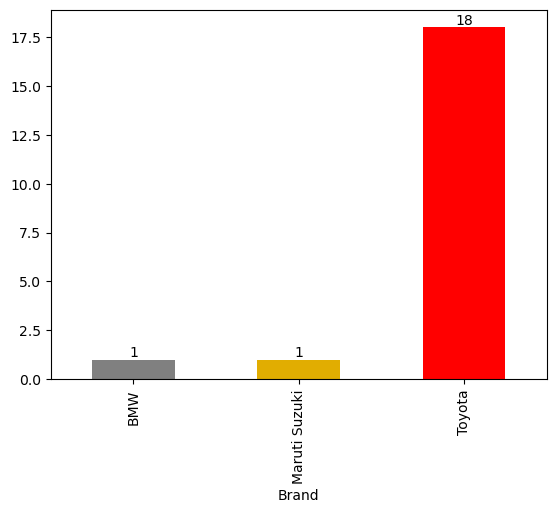

,Brand,Model,Year_of_Manufacture,Fuel_Type,KMs_Driven,Location,Car_Age_Category,Price(in_Lakhs)
77,Toyota,Urban Cruiser Hyryder V Hybrid,2023,Hybrid,11613,Bettahalsoor,New,21.49
123,Toyota,Camry Hybrid,2021,Hybrid,21400,BTM Layout,Moderate,39.75
209,BMW,X7 xDrive40d M Sport,2023,Mild Hybrid (Electric + Diesel),11000,Hebbal,New,143.75
299,Toyota,Vellfire Hybrid,2020,Hybrid,88000,Hebbal,Moderate,88.00
349,Toyota,Innova Hycross ZX (O) Hybrid 7 STR,2023,Hybrid,19000,Hebbal,New,36.45
355,Toyota,Vellfire Hybrid,2020,Hybrid,88000,Hebbal,Moderate,89.00
359,Toyota,Urban Cruiser Hyryder V NeoDrive,2022,Mild Hybrid(Electric + Petrol),9479,Kengeri Satellite Town,New,16.15
360,Toyota,Urban Cruiser Hyryder V Hybrid,2023,Hybrid,26654,Kengeri Satellite Town,New,19.50
363,Toyota,Urban Cruiser Hyryder V Hybrid,2023,Hybrid,31442,Kengeri Satellite Town,New,19.50
364,Toyota,Urban Cruiser Hyryder V Hybrid,2022,Hybrid,17582,Kengeri Satellite Town,New,19.25


In [69]:
hybrid = df[df['Fuel_Type'].str.contains('Hybrid')]
ax = hybrid.groupby(['Brand'])['Fuel_Type'].count().plot.bar(color=colors)
ax.bar_label(ax.containers[0])
plt.show()
hybrid